In [15]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns 
import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load the data
data = pd.read_excel("data.xlsx")

In [3]:
data.head()

,Fecha del hecho,Dia de la semana,Hora del hecho (HH:MM),Comuna/Corregimiento,Tipo de via de Hechos,Clase de Accidente,Genero,Edad,Características de la victima,Vehiculo de la Victima,Vehiculo 2 de la contraparte,Vehiculo 3 de la contraparte,Vehiculo 4 de la contraparte
0,2012-01-01,domingo,05:05:00,8,Municipal,Peatón Atropellado,Masculino,46,Peatón,Autónomo (Peatón),Vehiculo particular,No aplica,No aplica
1,2012-01-03,martes,20:00:00,6,Municipal,Colisión con Objeto Móvil,Masculino,79,Ciclista,Bicicleta,Motocicleta,No aplica,No aplica
2,2012-01-16,lunes,00:00:00,1,Municipal,Sin Dato,Femenino,73,Peatón,Autónomo (Peatón),Sin dato,No aplica,No aplica
3,2012-01-22,domingo,06:45:00,4,Municipal,Colisión con Objeto Fijo,Femenino,23,Conductor Moto,Motocicleta,No aplica,No aplica,No aplica
4,2012-01-25,miércoles,18:45:00,1,Municipal,Ciclista Atropellado,Femenino,5,Ciclista,Bicicleta,Camión/Camioneta,No aplica,No aplica


# Fields and Data Types 🚗:

This table contains detailed information about traffic accidents, including temporal details, geographic locations, types of incidents, and the characteristics of the individuals involved. It consists of the following columns:

### Temporal Details
- **Date of Incident**: The date on which the incident occurred, formatted as DD/MM/YYYY.
- **Day of the Week**: The day of the week on which the incident happened (e.g., Sunday, Monday, etc.).
- **Time of Incident**: The exact time of the incident, formatted as HH:MM:SS.

### Geographic Location
- **Municipality/Commune**: The commune or corregimiento where the incident took place.

### Incident Details
- **Type of Road**: The classification of the road or area where the incident occurred (e.g., Municipal roads).
- **Type of Accident**: The classification of the accident (e.g., Collision with a fixed object, Pedestrian hit, Cyclist hit, etc.).

### Victim Information
- **Gender**: Gender of the victim (e.g., Male, Female).
- **Age**: Age of the victim, ranging from young children to the elderly.
- **Victim's Characteristics**: The role of the victim in the incident (e.g., Pedestrian, Cyclist, Driver, Passenger, etc.).

### Vehicle Details
- **Victim's Vehicle**: The type of vehicle associated with the victim (e.g., Bicycle, Motorcycle, Autonomous Pedestrian, etc.).
- **Counterpart Vehicle 1**: The first vehicle involved in the incident, apart from the victim’s vehicle.
- **Counterpart Vehicle 2**: The second vehicle involved in the incident, if applicable.
- **Counterpart Vehicle 3**: The third vehicle involved in the incident, if applicable.

In [4]:
# Display information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Fecha del hecho                512 non-null    datetime64[ns]
 1   Dia de la semana               512 non-null    object        
 2   Hora del hecho (HH:MM)         512 non-null    object        
 3   Comuna/Corregimiento           512 non-null    object        
 4   Tipo de via de Hechos          512 non-null    object        
 5   Clase de Accidente             512 non-null    object        
 6   Genero                         512 non-null    object        
 7   Edad                           512 non-null    int64         
 8   Características de la victima  512 non-null    object        
 9   Vehiculo de la Victima         512 non-null    object        
 10  Vehiculo 2 de la contraparte   512 non-null    object        
 11  Vehiculo 3 de la co

In [5]:
# Descriptive statistics
data.describe()

,Fecha del hecho,Edad
count,512,512.000000
mean,2016-12-06 06:14:03.750000128,41.304688
min,2012-01-01 00:00:00,0.000000
25%,2014-06-28 00:00:00,24.000000
50%,2016-09-01 00:00:00,36.000000
75%,2019-05-29 06:00:00,56.000000
max,2022-03-13 00:00:00,94.000000
std,NaN,20.898809


In [6]:
# Display column names
data.columns

Index(['Fecha del hecho', 'Dia de la semana', 'Hora del hecho (HH:MM)',
       'Comuna/Corregimiento', 'Tipo de via de Hechos', 'Clase de Accidente',
       'Genero', 'Edad', 'Características de la victima',
       'Vehiculo de la Victima', 'Vehiculo 2 de la contraparte',
       'Vehiculo 3 de la contraparte', 'Vehiculo 4 de la contraparte'],
      dtype='object')

In [7]:
# Rename columns to make them concise and remove spaces
data = data.rename(columns={
    "Fecha del hecho": "Date",
    "Dia de la semana": "Day",
    "Hora del hecho (HH:MM)": "Time",
    "Comuna/Corregimiento": "Location",
    "Tipo de via de Hechos": "RoadType",
    "Clase de Accidente": "AccidentType",
    "Genero": "Gender",
    "Edad": "Age",
    "Características de la victima": "VictimRole",
    "Vehiculo de la Victima": "VictimVehicle",
    "Vehiculo 2 de la contraparte": "CounterpartVehicle1",
    "Vehiculo 3 de la contraparte": "CounterpartVehicle2",
    "Vehiculo 4 de la contraparte": "CounterpartVehicle3"
})

# Display the first few rows of the updated dataset
data.head()


,Date,Day,Time,Location,RoadType,AccidentType,Gender,Age,VictimRole,VictimVehicle,CounterpartVehicle1,CounterpartVehicle2,CounterpartVehicle3
0,2012-01-01,domingo,05:05:00,8,Municipal,Peatón Atropellado,Masculino,46,Peatón,Autónomo (Peatón),Vehiculo particular,No aplica,No aplica
1,2012-01-03,martes,20:00:00,6,Municipal,Colisión con Objeto Móvil,Masculino,79,Ciclista,Bicicleta,Motocicleta,No aplica,No aplica
2,2012-01-16,lunes,00:00:00,1,Municipal,Sin Dato,Femenino,73,Peatón,Autónomo (Peatón),Sin dato,No aplica,No aplica
3,2012-01-22,domingo,06:45:00,4,Municipal,Colisión con Objeto Fijo,Femenino,23,Conductor Moto,Motocicleta,No aplica,No aplica,No aplica
4,2012-01-25,miércoles,18:45:00,1,Municipal,Ciclista Atropellado,Femenino,5,Ciclista,Bicicleta,Camión/Camioneta,No aplica,No aplica


# Handling missing data

In [8]:
# Standardize text values to lowercase before replacing non-standard missing values
data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
data.replace(["sin dato", "no aplica"], np.nan, inplace=True)

# Analyze the percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("Percentage of missing values by column:\n", missing_percentage)

# Drop columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index
data.drop(columns=columns_to_drop, inplace=True)

# Drop rows with missing values in critical columns
data.dropna(subset=["AccidentType", "VictimRole", "VictimVehicle"], inplace=True)

# Fill missing values in categorical columns with the mode
categorical_cols = ["AccidentType", "VictimRole"]
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Verify if there are still missing values
print("\nMissing values after processing:")
print(data.isnull().sum())


Percentage of missing values by column:
 Date                    0.000000
Day                     0.000000
Time                    1.171875
Location                0.000000
RoadType                0.000000
AccidentType            5.664062
Gender                  0.000000
Age                     0.000000
VictimRole              2.148438
VictimVehicle           2.539062
CounterpartVehicle1    34.570312
CounterpartVehicle2    98.632812
CounterpartVehicle3    99.218750
dtype: float64

Missing values after processing:
Date                     0
Day                      0
Time                     4
Location                 0
RoadType                 0
AccidentType             0
Gender                   0
Age                      0
VictimRole               0
VictimVehicle            0
CounterpartVehicle1    158
dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21872\2048568520.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21872\2048568520.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


# EDA (Exploratory Data Analysis)

In [9]:
# Display information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 474 entries, 0 to 511
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 474 non-null    datetime64[ns]
 1   Day                  474 non-null    object        
 2   Time                 470 non-null    object        
 3   Location             474 non-null    object        
 4   RoadType             474 non-null    object        
 5   AccidentType         474 non-null    object        
 6   Gender               474 non-null    object        
 7   Age                  474 non-null    int64         
 8   VictimRole           474 non-null    object        
 9   VictimVehicle        474 non-null    object        
 10  CounterpartVehicle1  316 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 44.4+ KB
None


In [10]:
data.head()

,Date,Day,Time,Location,RoadType,AccidentType,Gender,Age,VictimRole,VictimVehicle,CounterpartVehicle1
0,2012-01-01,domingo,05:05:00,8,municipal,peatón atropellado,masculino,46,peatón,autónomo (peatón),vehiculo particular
1,2012-01-03,martes,20:00:00,6,municipal,colisión con objeto móvil,masculino,79,ciclista,bicicleta,motocicleta
3,2012-01-22,domingo,06:45:00,4,municipal,colisión con objeto fijo,femenino,23,conductor moto,motocicleta,NaN
4,2012-01-25,miércoles,18:45:00,1,municipal,ciclista atropellado,femenino,5,ciclista,bicicleta,camión/camioneta
5,2012-01-29,domingo,00:00:00,2,municipal,colisión con objeto móvil,masculino,49,conductor moto,motocicleta,vehiculo particular


In [11]:
# Standardize the capitalization of the "Day" column
data["Day"] = data["Day"].str.capitalize()

[datetime.time(5, 5) datetime.time(20, 0) datetime.time(6, 45)
 datetime.time(18, 45) datetime.time(0, 0) datetime.time(3, 57)
 datetime.time(3, 25) datetime.time(17, 45) datetime.time(7, 23)
 datetime.time(22, 10) datetime.time(18, 0) datetime.time(19, 40)
 datetime.time(9, 20) datetime.time(10, 22) datetime.time(23, 15)
 datetime.time(14, 28) datetime.time(12, 17) datetime.time(6, 35)
 datetime.time(21, 30) datetime.time(20, 30) datetime.time(10, 50)
 datetime.time(5, 48) datetime.time(12, 50) datetime.time(7, 32)
 datetime.time(11, 10) datetime.time(1, 40) datetime.time(19, 12)
 datetime.time(0, 42) datetime.time(7, 18) datetime.time(2, 0)
 datetime.time(20, 47) datetime.time(6, 0) datetime.time(5, 0)
 datetime.time(23, 5) datetime.time(6, 30) datetime.time(1, 50)
 datetime.time(15, 0) datetime.time(7, 0) datetime.time(2, 30)
 datetime.time(16, 20) datetime.time(22, 30) datetime.time(1, 45)
 datetime.time(4, 10) datetime.time(7, 25) datetime.time(22, 40)
 datetime.time(16, 30) datet

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21872\2267552919.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[i + 1], data=data, x=feature, palette=color_palette)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21872\2267552919.py:56: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(ax=axes[i + 1], data=data, x=feature, palette=color_palette)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21872\2267552919.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i + 1].set_xticklabels(axes[i + 1].get_xticklabels(), rotation=30, ha='right', fontsize=10)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21872\2267552919.py:56: FutureWarning: 

Passing `pal

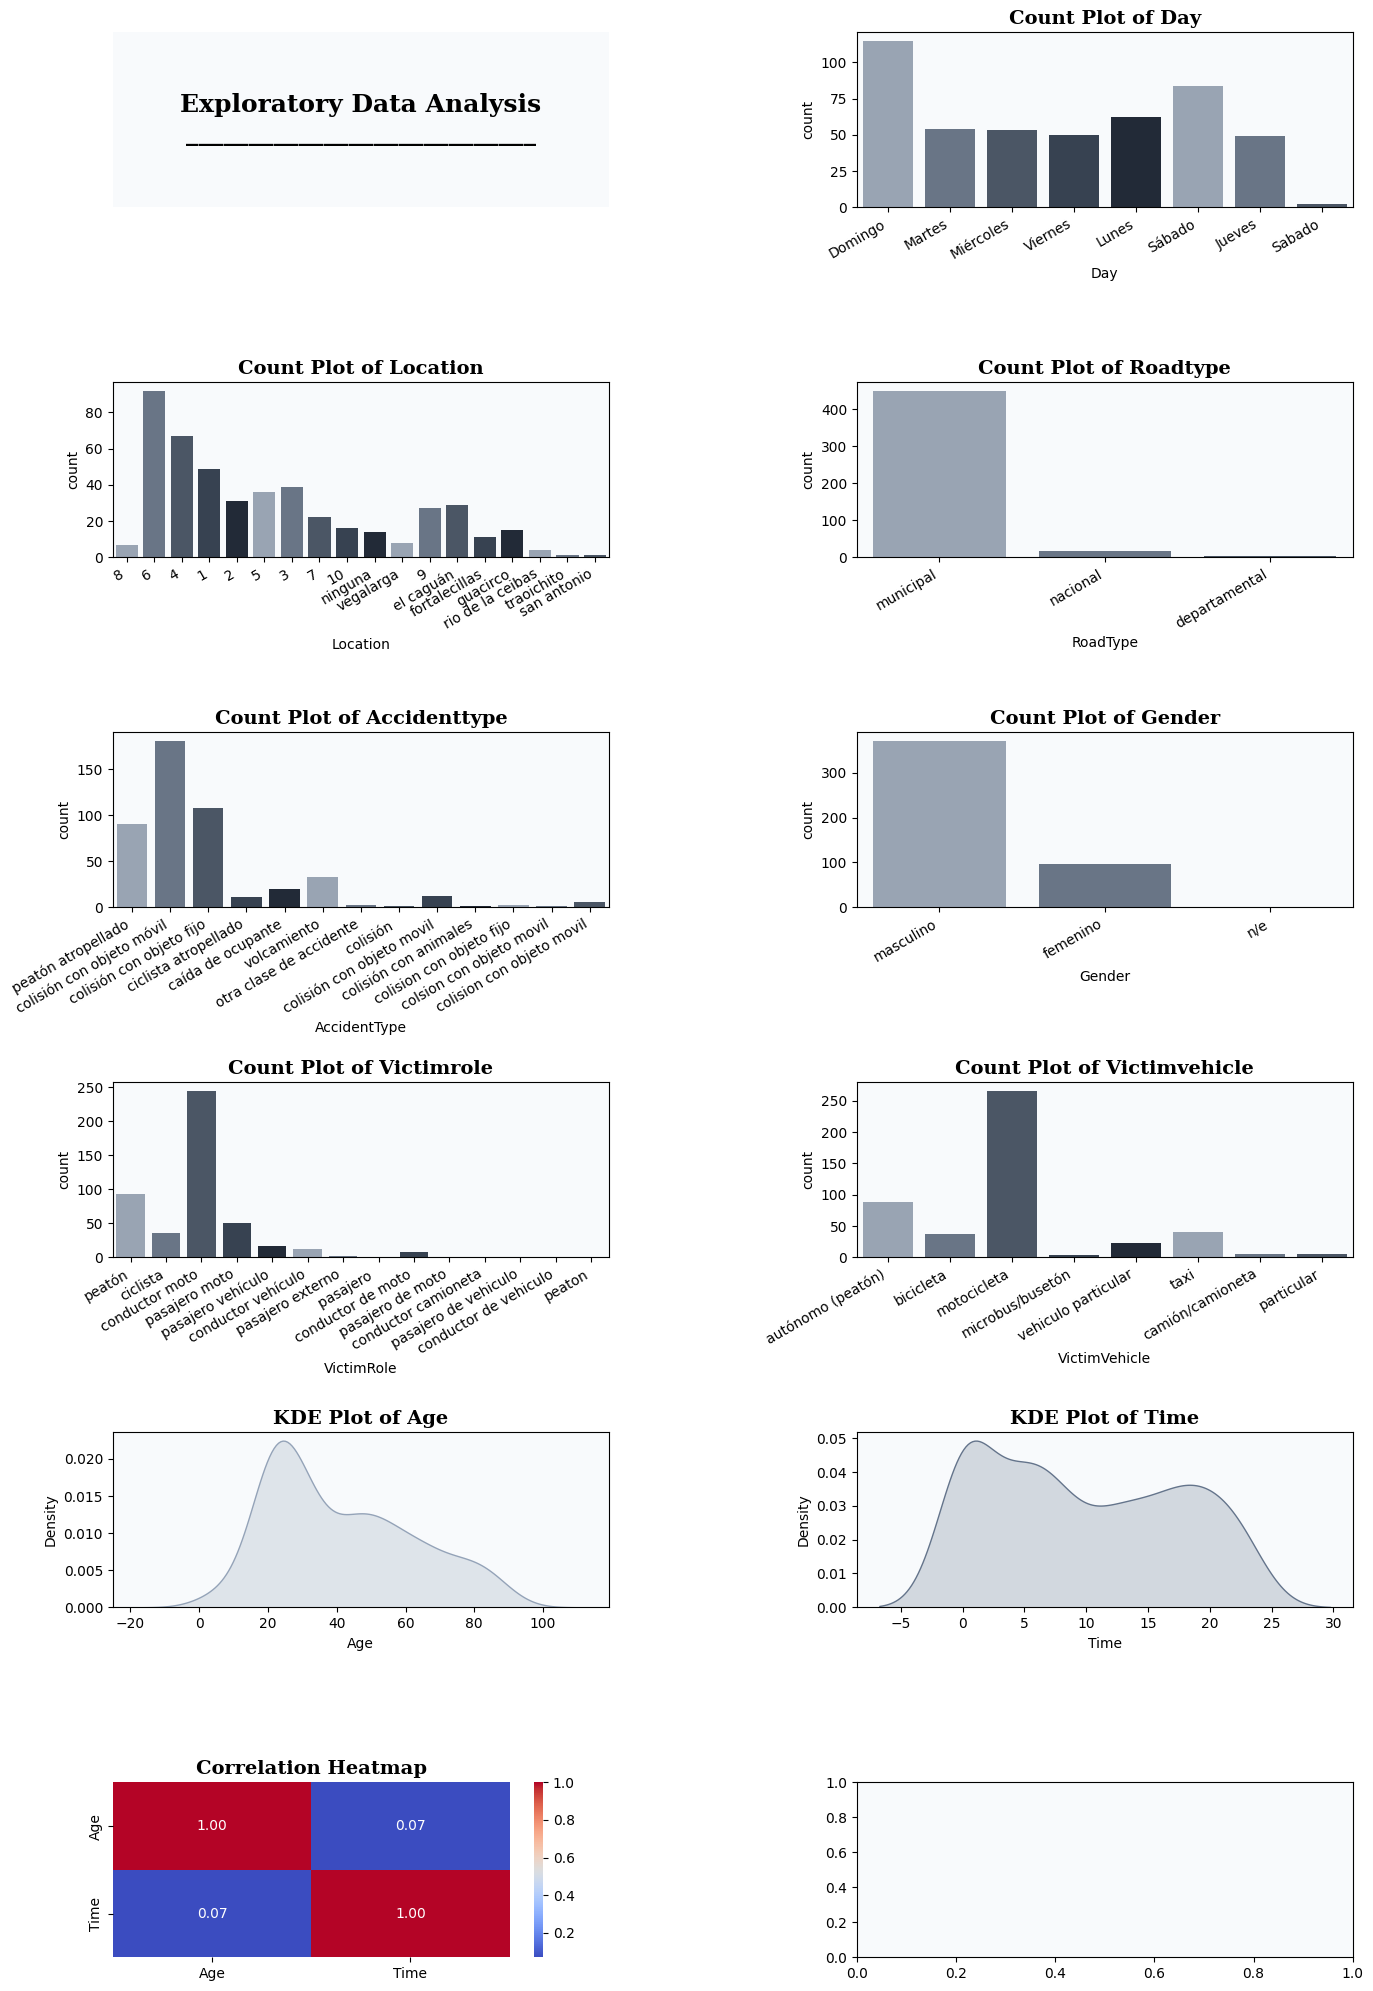

In [12]:
# Check unique values ​​in 'Time' column to identify invalid values# Verificar valores únicos en la columna 'Time' para identificar valores no válidos
print(data['Time'].unique())

# Handling invalid values ​​in 'Time' column
def clean_time(value):
    try:
        # I try to convert to datetime format
        return pd.to_datetime(value, format='%H:%M:%S').time()
    except ValueError:
        # If it fails, we return a default value
        return None

# Apply the function to clear the column
data['Time'] = data['Time'].apply(clean_time)

# Delete rows with invalid values ​​in 'Time' (optional)
data = data.dropna(subset=['Time'])

# Convert 'Time' column to numeric hours
data['Time'] = data['Time'].apply(lambda x: x.hour if x is not None else 0)

# Define general settings
background_color = "#f8fafc"
color_palette = ["#94a3b8", "#64748b", "#475569", "#334155", "#1e293b"]

# Adjust figure size and layout
fig = plt.figure(figsize=(16, 25))  
num_rows, num_cols = 6, 2 
gs = fig.add_gridspec(num_rows, num_cols)
gs.update(wspace=0.5, hspace=1)

# Create subplot axes
axes = [fig.add_subplot(gs[i, j]) for i in range(num_rows) for j in range(num_cols)]
for ax in axes:
    ax.set_facecolor(background_color)

# Title for the entire EDA
axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Exploratory Data Analysis\n____________________________',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=18, fontweight='bold',
             fontfamily="serif",
             color="#000000")

# Count plots for categorical features
categorical_features = ['Day', 'Location', 'RoadType', 'AccidentType', 'Gender', 'VictimRole', 'VictimVehicle']
for i, feature in enumerate(categorical_features):
    sns.countplot(ax=axes[i + 1], data=data, x=feature, palette=color_palette)
    axes[i + 1].set_title(f"Count Plot of {feature.capitalize()}", fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    axes[i + 1].set_xticklabels(axes[i + 1].get_xticklabels(), rotation=30, ha='right', fontsize=10)

# KDE plots for numerical features
numerical_features = ['Age', 'Time']
for i, feature in enumerate(numerical_features):
    sns.kdeplot(ax=axes[i + len(categorical_features) + 1], data=data, x=feature, fill=True, color=color_palette[i % len(color_palette)])
    axes[i + len(categorical_features) + 1].set_title(f"KDE Plot of {feature.capitalize()}", fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")

# Heatmap for correlation (only numerical data is suitable)
corr = data[['Age', 'Time']].corr()
sns.heatmap(ax=axes[len(categorical_features) + len(numerical_features) + 1], data=corr, annot=True, cmap="coolwarm", fmt=".2f")
axes[len(categorical_features) + len(numerical_features) + 1].set_title("Correlation Heatmap", fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Encoding Categorical Variables

In [13]:
# We make a copy of the data to preserve the original version
data_copy = data.copy()

# We identify the categorical columns
categorical_columns = ['Day', 'Location', 'RoadType', 'AccidentType', 'Gender', 'VictimRole', 'VictimVehicle']

# Convert all categorical columns to string type
for col in categorical_columns:
    data_copy[col] = data_copy[col].astype(str)

# Apply LabelEncoder to categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    data_copy[col] = label_encoder.fit_transform(data_copy[col])

# Check the transformations performed
print(data_copy.describe())

                                Date         Day        Time    Location  \
count                            469  469.000000  469.000000  469.000000   
mean   2016-12-13 02:42:43.752665344    3.008529    9.765458    5.637527   
min              2012-01-01 00:00:00    0.000000    0.000000    0.000000   
25%              2014-09-17 00:00:00    1.000000    3.000000    3.000000   
50%              2016-10-06 00:00:00    3.000000    8.000000    5.000000   
75%              2019-05-26 00:00:00    6.000000   17.000000    7.000000   
max              2022-03-13 00:00:00    7.000000   23.000000   17.000000   
std                              NaN    2.493567    7.690626    3.844293   

         RoadType  AccidentType      Gender         Age  VictimRole  \
count  469.000000    469.000000  469.000000  469.000000  469.000000   
mean     1.027719      7.759062    0.797441   41.302772    6.411514   
min      0.000000      0.000000    0.000000    0.000000    0.000000   
25%      1.000000      6.000000

# Data Modeling

In [16]:
# Prepare the data for modeling
X = data_copy[['Day', 'Location', 'RoadType', 'Gender', 'VictimRole', 'VictimVehicle', 'Age']]
y = data_copy['AccidentType']  # Assuming we want to classify the type of accident

# Convert all values in categorical columns to string to avoid mixed types
categorical_columns = ['Day', 'Location', 'RoadType', 'Gender', 'VictimRole', 'VictimVehicle']
for col in categorical_columns:
    X[col] = X[col].astype(str)  # Convert to string

# Encoding categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initializing the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 0  0  0  0  0  0  0  2  0  1  1]
 [ 0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  7  0 13  0  0  2]
 [ 0  0  0  0  0  1  0  1  0  0  0]
 [ 0  0  0  0  0  4  0 22  0  2  0]
 [ 0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  1  0  2  1  5  0  0  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.50      0.32      0.39        22
           7       0.00      0.00      0.00         2
           8       0.44      0.79      0.56        28
           9       0.00      0.00      0.00         1
          11       0

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21872\3197352870.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)  # Convert to string
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21872\3197352870.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)  # Convert to string
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21872\3197352870.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde